# Algunos trucos para definir funciones

La clase pasada, antes de ***arruinarse todo por la falla de la paqueteria PyPlot***, vimos como crear funciones. El ejercicio, por mucho, más difícil de la clase fue el de crear la función exponencial usando series de Tylor. Hoy comenzaremos la clase con la solución a ese problema de una forma muy general, haciendo funciones cuyos argumentos pueden ser funciones. 

Lo primero que vamos a hacer, es dar algunos trucos a la hora de definir las funciones en Julia. 

Por ejemplo, pueden definir algunos valores de la función por default. Por ejemplo: 

In [1]:
f(x, y, r=1) = x^2 + y^2 - r^2

f (generic function with 2 methods)

In [2]:
f(1,2)

4

In [3]:
f(1,2,3)

-4

In [4]:
f(1,2,1)

4

También se pueden poner argumentos que no estén ordenados, sino que se llamen por su nombre, los "Keyword Arguments". En este caso, en vez de poner atención en el lugar donde están los argumentos, escribimos su nombre. Por ejemplo f(1,2,r=3,m=5)=f(1,2,m=5,r=3). 

Para definir esta clase de argumentos, usamos ";" para separar los argumentos ordenados y los llamados por palabra clave (keyword). Por ejemplo 

In [5]:
f(x, y; r=1, m=3) = x^2 + y-r/m

f (generic function with 2 methods)

In [6]:
f(1, 2, m=1, r=2) == f(1, 2, r=2, m=1)

true

Nota que estos casos siempre tienen argumentos por default para los que son llamados por palabra clave. 

Un último truco al definir las funciones, es especificar el tipo de argumento que se admite. Para esto usamos "::" después del la variable y seguido de ello, el tipo de argumento admitido. Por ejemplo: 

In [7]:
f(x::Int) = x^2

f (generic function with 3 methods)

In [8]:
f(2)

4

In [9]:
f(2.2)

LoadError: LoadError: MethodError: `f` has no method matching f(::Float64)
Closest candidates are:
  f(::Any, !Matched::Any)
  f(::Any, !Matched::Any, !Matched::Any)
while loading In[9], in expression starting on line 1

## Función de funciones

 

Comenzaremos por explicar qué es una función anónima. Una función anónima, es una que no tiene nombre. Por ejemplo: 

In [10]:
function (x)
    x^2
end

(anonymous function)

ó

In [11]:
x -> x^2

(anonymous function)

Esta clase de funciones, se pueden usar para meter dentro de otras funciones que piden como argumento una función. El ejemplo por excelencia es el mapeo: 

In [12]:
map(x->x^2,[1,2,3])

3-element Array{Int64,1}:
 1
 4
 9

map(round, [1.2,1.4,1.8])

map(f,x), simplemente evalua f(x).  

Ahora ya tenemos todas las herramientas para hacer una función que use como argumento una función. Simplemente tenemos que especificar que el argumento es una función. Después, para usar la función de funciones, podemos usar funciones anónimas. 

Así por ejemplo, podemos hacer la función $\sum_{i \in X}{f(i)}$ 

In [13]:
Σ(f::Function, X)=sum(f(X))

Σ (generic function with 1 method)

Si ahora queremos sumar el cuadrado de todos los enteros entre m y n, simplemente aplicamos la función $\sum(x \rightarrow x^2,n:m)$

In [14]:
n=1; m=10
Σ(x -> x.^2, n:m)

385

In [15]:
Σ(sin, 1:10)

1.4111883712180104

Definiré ahora mi propia función factorial, para que permita aplicarlo a vectores. 

In [16]:
function mi_factorial(n)
    i=length(n)
    fac=zeros(i)
    for j = 1:i
        fac[j]=factorial(float(n[j]))
    end
    return fac
end

mi_factorial (generic function with 1 method)

In [17]:
mi_factorial([1,2,3,4,5])

5-element Array{Float64,1}:
   1.0
   2.0
   6.0
  24.0
 120.0

Ahora sí, la exponencial en series de tylor es: $e^x=\sum(i \rightarrow \frac{x^i}{i!}, 0:\infty)$, o para nuestros propósitos numpericos, 
$exp(x,n)=\sum(i \rightarrow \frac{x^i}{i!}, 0:n)$

In [18]:
mi_exp(x,n)=Σ(i-> (float(x).^i)./mi_factorial(i),0:n)

mi_exp (generic function with 1 method)

In [19]:
mi_exp(10,100)-exp(10)

0.0

Esto por supuesto tiene muchas buenas implicaciones. En general, ahora $\sum$ ya está definido y con ello puedo hacer de forma simple cualquier desarrollo de fourier o de tylor. 

Utilizando lo aprendido: 

[1] Haz tu propia función general (funcional) para calcular sumas. 

[2] Haz una funcion general (funcional) para calcular productos. 

[3] La integral de una función se puede ver también como una suma. Haz una función que integre con un determinado paso. 

Este último problema es extra difícil, por lo que sólo se revisará que la integral calcule lo que debe, dada la funcion f, y los extremos a,b donde se evalua. No se revisará la eficiencia del programa, ni los detalles de sintaxis.  

# Graficación

Ahora que somos capaces de producir datos interesantes, se nos antoja *visualizarlos*, es decir, graficarlos.

Hay varios paquetes gráficos en Julia, todavía en desarrollo. Tal vez el más maduro es `PyPlot`, que provee un interfaz juliano al paquete `matplotlib` de Python para graficar.

Para utilizarlo, es necesario primero instalar el paquete:

Pkg.add("PyPlot")

Este comando (`Pkg.add`) es para *instalar* el paquete en tu sistema. Por lo tanto, sólo es necesario ejecutarlo *una vez* en la vida (o, al menos, hasta que reinstales Julia).

y luego cargarlo:

In [20]:
using PyPlot

[4] Crea un arreglo `x` con números igualmente espaciados de -3 a 3 y un paso chiquito.

[5] Crea un arreglo `y` que corresponde a la función $3x^2 - 2$.

[6] Usa la función `plot` de `PyPlot` para graficar la función.

[7] Utiliza la ayuda de la función [`?plot` o `help(plot)`] para cambiar el estilo de la gráfica para utilizar líneas rojas y puntos verdes.

[8] Busca cómo agregar etiquetas a los ejes (lo cual debe hacerse en *cualquier* gráfica) y un título global, así como una leyenda.

Ejemplo de gráfica completa: 

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in getindex at abstractarray.jl:488
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[21], in expression starting on line 36


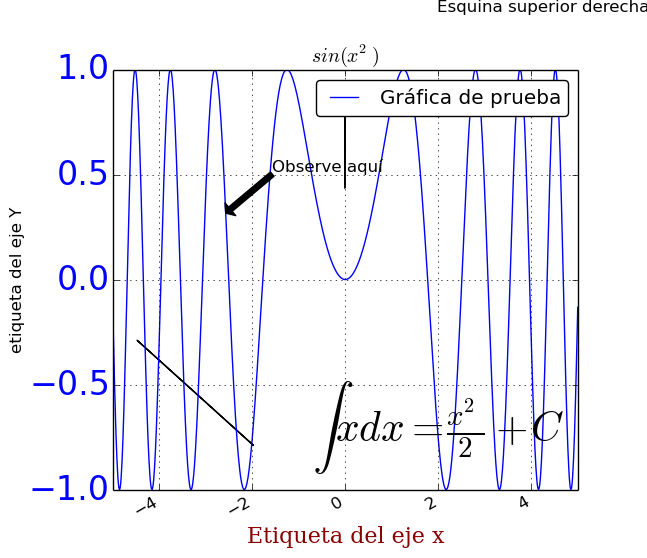

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in getindex at array.jl:283
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[21], in expression starting on line 46


In [21]:
##########
#  Plot  #
##########
fig = figure("pyplot_annotation",figsize=(6,6)) # Create a figure and save its handle
#ax = axes([0.12,0.2,0.75,0.7])
ax = gca()
x =-5:.01:5
y = sin(x.^2)
dx = maximum(x) - minimum(x)
dy = maximum(y) - minimum(y)
p = plot(x,y,linestyle="-",marker="None",label="Gráfica de prueba") # Plot a basic line
axis("tight") # Fit the axis tightly to the plot
title(L"$sin(x^2)$")
grid("on")
legend(loc="upper right",fancybox="true") # Create a legend of all the
    # existing plots using their labels as names

##################
#  Text Styling  #
##################
font1 = Dict("family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>16)
xlabel("Etiqueta del eje x",fontdict=font1)
ylabel("etiqueta del eje Y")

ax = gca()
setp(ax[:get_yticklabels](),fontsize=24,color="blue") # Y Axis font formatting

#################
#  Arrow Tests  #
#################
# This arrows oriengt toward the x-axis, the more horizontal they are
# the more skewed they look
arrow(x[floor(Int,length(x)/2)],
    0.4,
    0.0009,
    0.4,
    head_width=0.001,
    width=0.00015,
    head_length=0.07,
    overhang=0.5,
    head_starts_at_zero="true",
    facecolor="red")
arrow(x[floor(Int,0.3length(x))]-0.25dx,
    y[floor(Int,0.3length(y))]+0.25dy,
    0.25dx,
    -0.25dy,
    head_width=0.001,
    width=0.00015,
    head_length=0.07,
    overhang=0.5,
    head_starts_at_zero="true",
    facecolor="red",
    length_includes_head="true")

###########################
#  Anotaciones con texto  #
###########################
annotate("Observe aquí",
    xy=[x[floor(Int,length(x)/4.1)];y[floor(Int,length(y)/4.1)]],
    xytext=[x[floor(Int,length(x)/4.1)]+0.1dx;y[floor(Int,length(y)/4.1)]+0.1dy],
    xycoords="data",
    arrowprops=Dict("facecolor"=>"black")) # Julia dictionary objects are
        # automatically converted to Python object when they pass into
        # a PyPlot function
annotate("Esquina superior derecha",
    xy=[1;1],
    xycoords="figure fraction",
    xytext=[0,0],
    textcoords="offset points",
    ha="right",
    va="top")
annotate(L"$\int xdx = \frac{x^2}{2} + C$",
    xy=[1;0],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")

fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
fig[:canvas][:draw]() # Update the figure

In [22]:
ifloor(1.2)

 in depwarn at deprecated.jl:73
 in ifloor at deprecated.jl:50
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[22], in expression starting on line 1


1

# Continuará...